In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt 
import warnings 
import os

warnings.filterwarnings('ignore')
os.environ['KMP_DUPLICATE_LIB_OK']='True' # to prevent kernel from terminating
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

In [4]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
X_train[0].shape

(32, 32, 3)

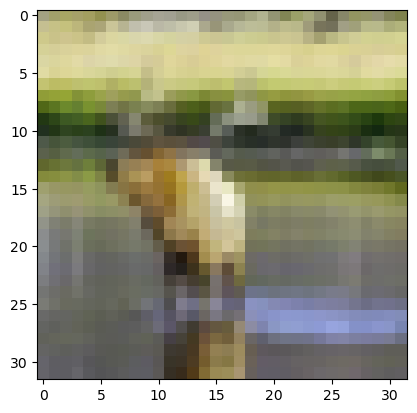

In [6]:
plt.imshow(X_train[89])

In [7]:
# Preprocessing

In [8]:
X_train = X_train/255
X_test = X_test/255

In [9]:
X_test.shape

(10000, 32, 32, 3)

In [10]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [11]:
## transforming to categorical

In [12]:
from tensorflow.keras.utils import to_categorical

In [13]:
y_cat_train = to_categorical(y_train)
y_cat_test = to_categorical(y_test)

In [14]:
## Creating the model

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [16]:
model = Sequential()
#Convolution layer
model.add(Conv2D(filters=32,kernel_size=(4,4),
                input_shape=(32,32,3),activation='relu'))
#pooling layer
model.add(MaxPool2D(pool_size=(2,2)))

#Convolution layer
model.add(Conv2D(filters=32,kernel_size=(4,4),
                input_shape=(32,32,3),activation='relu'))
#pooling layer
model.add(MaxPool2D(pool_size=(2,2)))

#Flatten images
model.add(Flatten())

model.add(Dense(256,activation='relu'))

model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics='accuracy')

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 256)               2

In [18]:
## Using early stopping

In [19]:
from tensorflow.keras.callbacks import EarlyStopping

In [20]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [21]:
model.fit(X_train,y_cat_train,epochs=20,
         validation_data=(X_test,y_cat_test),callbacks=early_stop)

Epoch 1/20
1563/1563 [==============================] - 43s 26ms/step - loss: 1.5035 - accuracy: 0.4556 - val_loss: 1.3606 - val_accuracy: 0.5233
Epoch 2/20
1563/1563 [==============================] - 43s 27ms/step - loss: 1.1714 - accuracy: 0.5875 - val_loss: 1.1742 - val_accuracy: 0.5895
Epoch 3/20
1563/1563 [==============================] - 34s 22ms/step - loss: 1.0187 - accuracy: 0.6435 - val_loss: 1.0132 - val_accuracy: 0.6431
Epoch 4/20
1563/1563 [==============================] - 34s 22ms/step - loss: 0.9117 - accuracy: 0.6809 - val_loss: 0.9923 - val_accuracy: 0.6507
Epoch 5/20
1563/1563 [==============================] - 35s 22ms/step - loss: 0.8223 - accuracy: 0.7144 - val_loss: 0.9451 - val_accuracy: 0.6809
Epoch 6/20
1563/1563 [==============================] - 36s 23ms/step - loss: 0.7405 - accuracy: 0.7403 - val_loss: 0.9712 - val_accuracy: 0.6721
Epoch 7/20
1563/1563 [==============================] - 36s 23ms/step - loss: 0.6748 - accuracy: 0.7643 - val_loss: 0.9701 -

In [22]:
# Evaluations

In [23]:
metrics = pd.DataFrame(model.history.history)

In [24]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.503507,0.45556,1.360641,0.5233
1,1.171351,0.58750,1.174188,0.5895
2,1.018662,0.64354,1.013169,0.6431
3,0.911673,0.68086,0.992334,0.6507
4,0.822279,0.71436,0.945135,0.6809
5,0.740548,0.74032,0.971206,0.6721
6,0.674772,0.76426,0.970116,0.6856


In [25]:
metrics.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

<Axes: >

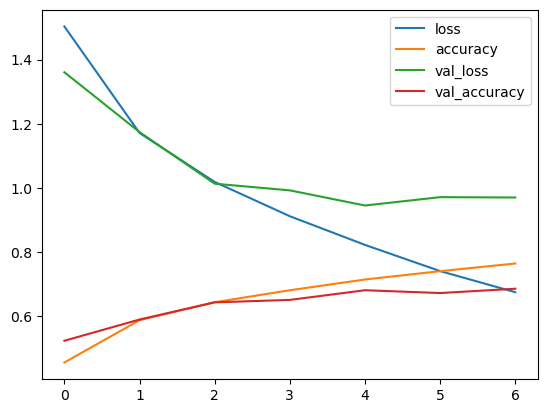

In [26]:
metrics.plot()

<Axes: >

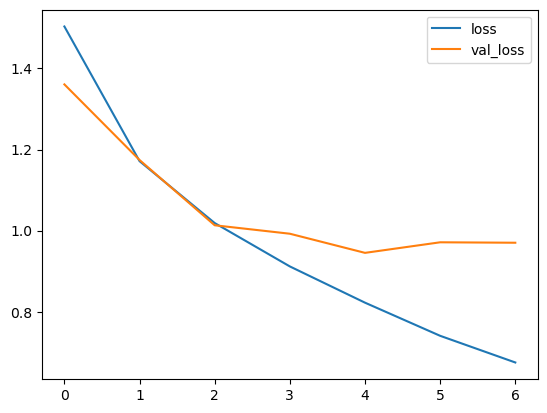

In [27]:
metrics[['loss','val_loss']].plot()

<Axes: >

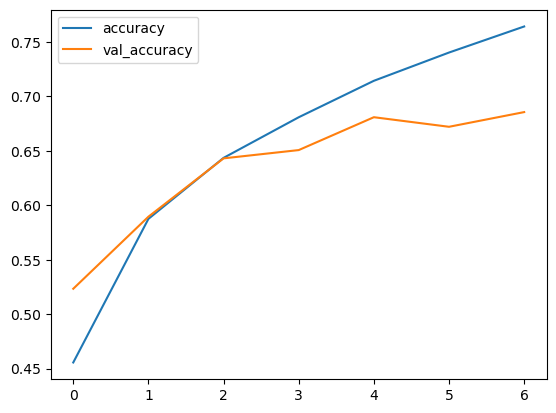

In [28]:
metrics[['accuracy','val_accuracy']].plot()

In [29]:
# Classification report and confussion matrix

In [30]:
from sklearn.metrics import classification_report,confusion_matrix

In [31]:
pred = model.predict(X_test).argmax(axis=-1)

313/313 [==============================] - 2s 6ms/step


In [32]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.67      0.78      0.72      1000
           1       0.82      0.78      0.80      1000
           2       0.71      0.45      0.55      1000
           3       0.48      0.53      0.51      1000
           4       0.67      0.62      0.64      1000
           5       0.59      0.58      0.58      1000
           6       0.77      0.76      0.76      1000
           7       0.74      0.73      0.74      1000
           8       0.71      0.85      0.77      1000
           9       0.73      0.78      0.75      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.68     10000
weighted avg       0.69      0.69      0.68     10000



In [33]:
print(confusion_matrix(y_test,pred))

[[778  19  20  18  13   5   8   6  98  35]
 [ 30 782   2  10   3   2  10   2  55 104]
 [103  10 445 102  96  92  65  38  30  19]
 [ 36  12  26 532  56 176  49  37  46  30]
 [ 40   7  37  89 617  39  53  88  17  13]
 [ 28   5  39 198  40 583  22  55  19  11]
 [ 13  12  27  76  42  27 759  13  16  15]
 [ 34   4  22  59  44  56   4 730   7  40]
 [ 58  26   7  12   3   9   8   1 852  24]
 [ 37  77   3   8   8   6   7  13  63 778]]


In [34]:
## Predicting on a single image

In [35]:
my_image = X_test[7]

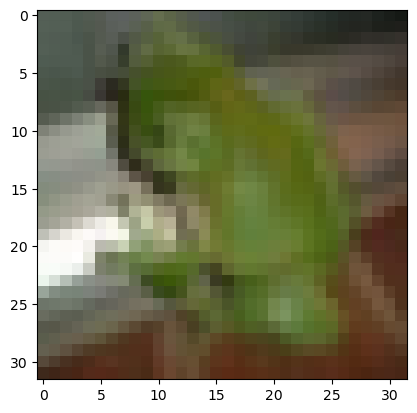

In [36]:
plt.imshow(my_image)

In [37]:
y_test[7]

array([6], dtype=uint8)

In [38]:
model.predict(my_image.reshape(1,32,32,3)).argmax(axis=-1) 

1/1 [==============================] - 0s 39ms/step


array([6], dtype=int64)

In [39]:
## The model predicted correctly as seen on y_test